In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

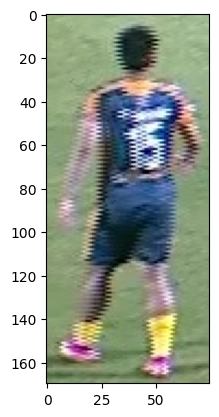

In [6]:
plt.imshow(image)
plt.show()

# Take the top half of the img

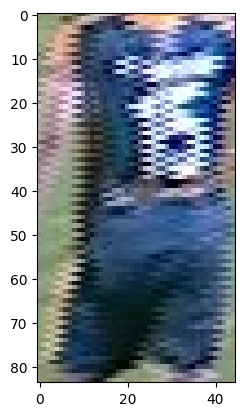

In [18]:
mid_image = image[int(image.shape[0]*0.2): int(image.shape[0]*0.7),
                  int(image.shape[1]*0.2): int(image.shape[1]*0.8)]

plt.imshow(mid_image)
plt.show()

# Cluster the image into two clusters

In [1]:
# Reshape the image into 2d array
image_2d = mid_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape labels into orginal image shape
clustered_image = labels.reshape(mid_image.shape[0], mid_image.shape[1])

# display
plt.imshow(clustered_image)
plt.show()

NameError: name 'mid_image' is not defined

In [16]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, 1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [18]:
player_cluster = 1-non_player_cluster
print(player_cluster)


1


In [19]:
kmeans.cluster_centers_[player_cluster]

array([49.7648943 , 64.01601537, 85.8673927 ])